## 统计episode成功个数

### Gibson

In [3]:
import os
import gzip
import json
import re

# 定义源目录和目标目录
source_dir = "data/datasets/objectnav/gibson/v1.1/val/content"

total_num = 0
for filename in os.listdir(source_dir):
    if filename.endswith(".json.gz"):
        # 解压缩并读取json.gz文件
        source_file = os.path.join(source_dir, filename)
        with gzip.open(source_file, "rt") as f:
            content = f.read()

        # 将内容解析为JSON格式
        scene_data = json.loads(content)
        episode_num = len(scene_data['episodes'])
        total_num += episode_num
    print(f'This episode num: {episode_num}')
print(f"total_num: {total_num}")


This episode num: 200
This episode num: 200
This episode num: 200
This episode num: 200
This episode num: 1
This episode num: 1
This episode num: 200
This episode num: 1
This episode num: 1
This episode num: 1
total_num: 1005


### MP3D

In [4]:
import os
import gzip
import json
import re

# 定义源目录和目标目录
source_dir = "data/datasets/objectnav/mp3d/v1/val/content"

total_num = 0
for filename in os.listdir(source_dir):
    if filename.endswith(".json.gz"):
        # 解压缩并读取json.gz文件
        source_file = os.path.join(source_dir, filename)
        with gzip.open(source_file, "rt") as f:
            content = f.read()

        # 将内容解析为JSON格式
        scene_data = json.loads(content)
        episode_num = len(scene_data['episodes'])
        total_num += episode_num
    print(f'This episode num: {episode_num}')
print(f"total_num: {total_num}")


This episode num: 200
This episode num: 198
This episode num: 200
This episode num: 201
This episode num: 200
This episode num: 200
This episode num: 200
This episode num: 200
This episode num: 201
This episode num: 198
This episode num: 197
total_num: 2195


### HM3D

In [1]:
import os
import gzip
import json
import re

# 定义源目录和目标目录
source_dir = "data/datasets/objectnav/hm3d/v1/val/content"

total_num = 0
for filename in os.listdir(source_dir):
    if filename.endswith(".json.gz"):
        # 解压缩并读取json.gz文件
        source_file = os.path.join(source_dir, filename)
        with gzip.open(source_file, "rt") as f:
            content = f.read()

        # 将内容解析为JSON格式
        scene_data = json.loads(content)
        episode_num = len(scene_data['episodes'])
        total_num += episode_num
    print(f'This episode num: {episode_num}')
print(f"total_num: {total_num}")


KeyboardInterrupt: 

## 统计目标在各楼层的信息，记录表格

In [2]:
import os
import gzip
import json
import csv

# 定义源目录
source_dir = "data/datasets/objectnav/hm3d/v1/val/content"
# 定义目标CSV文件路径
output_csv = "scene_object_stats_val.csv"
# 目标类别列表
target_categories = ["chair", "bed", "plant", "toilet", "tv_monitor", "sofa"]

# 创建并打开CSV文件准备写入
with open(output_csv, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # 写入表头
    csv_writer.writerow(['scene_name', 'category', 'count', 'positions'])
    
    # 遍历源目录中的所有文件
    for filename in os.listdir(source_dir):
        if filename.endswith(".json.gz"):
            # 提取场景名称（去掉.json.gz后缀）
            scene_name = filename.split('.')[0]
            source_path = os.path.join(source_dir, filename)
            
            # 解压并读取JSON内容
            with gzip.open(source_path, 'rt') as f:
                scene_data = json.load(f)
            
            # 获取目标信息字典（若不存在则返回空字典）
            goals_by_category = scene_data.get('goals_by_category', {})
            
            # 遍历每个目标类别
            for category in target_categories:
                # 构造目标类别键名（例如："cvZr5TUy5C5.basis.glb_chair"）
                category_key = f"{scene_name}.basis.glb_{category}"
                # 获取该类别下的所有目标实例（若不存在则返回空列表）
                instances = goals_by_category.get(category_key, [])
                
                # 统计目标数量和位置
                count = len(instances)
                positions = [str(instance['position']) for instance in instances]
                # 将位置列表转换为分号分隔的字符串
                positions_str = '; '.join(positions)
                
                # 将数据写入CSV
                csv_writer.writerow([scene_name, category, count, positions_str])

print(f"统计数据已保存至：{output_csv}")

统计数据已保存至：scene_object_stats.csv


In [13]:
import os
import gzip
import json
import csv

# 定义源目录
source_dir = "data/datasets/objectnav/hm3d/v1/train/content"
# 定义目标CSV文件路径
output_csv = "scene_object_stats_train.csv"
# 目标类别列表
target_categories = ["chair", "bed", "plant", "toilet", "tv_monitor", "sofa"]

# 创建并打开CSV文件准备写入
with open(output_csv, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # 写入表头
    csv_writer.writerow(['scene_name', 'category', 'count', 'positions'])
    
    # 遍历源目录中的所有文件
    for filename in os.listdir(source_dir):
        if filename.endswith(".json.gz"):
            # 提取场景名称（去掉.json.gz后缀）
            scene_name = filename.split('.')[0]
            source_path = os.path.join(source_dir, filename)
            
            # 解压并读取JSON内容
            with gzip.open(source_path, 'rt') as f:
                scene_data = json.load(f)
            
            # 获取目标信息字典（若不存在则返回空字典）
            goals_by_category = scene_data.get('goals_by_category', {})
            
            # 遍历每个目标类别
            for category in target_categories:
                # 构造目标类别键名（例如："cvZr5TUy5C5.basis.glb_chair"）
                category_key = f"{scene_name}.basis.glb_{category}"
                # 获取该类别下的所有目标实例（若不存在则返回空列表）
                instances = goals_by_category.get(category_key, [])
                
                # 统计目标数量和位置
                count = len(instances)
                positions = [str(instance['position']) for instance in instances]
                # 将位置列表转换为分号分隔的字符串
                positions_str = '; '.join(positions)
                
                # 将数据写入CSV
                csv_writer.writerow([scene_name, category, count, positions_str])

print(f"统计数据已保存至：{output_csv}")

统计数据已保存至：scene_object_stats_train.csv


## 表格记录每层目标物体

## v2 目标物体分层

### HM3D val

In [4]:
import pandas as pd
import ast

# 读取数据
df = pd.read_excel("scene_object_stats_hm3d_val.xlsx")

# 预处理函数保持原逻辑
def preprocess_scene(group):
    y_coords = []
    floor_num = group['floor_num'].iloc[0]
    for _, row in group.iterrows():
        if row['count'] == 0:
            continue
        positions = row['positions']
        if pd.isna(positions) or not positions.strip():
            continue
        for pos_str in positions.split('; '):
            try:
                pos = ast.literal_eval(pos_str.strip())
                y_coords.append(pos[1])
            except:
                continue
    
    # 单楼层场景直接标记为 (None, None, 1)
    if floor_num == 1 or not y_coords:
        return (None, None, floor_num)
    else:
        min_y = min(y_coords)
        max_y = max(y_coords)
        interval = (max_y - min_y) / floor_num
        return (min_y, interval, floor_num)

# 按场景分组预计算
scene_data = {}
for scene_name, group in df.groupby('scene_name'):
    scene_data[scene_name] = preprocess_scene(group)

# 逐行计算 target_floors
def calculate_floors(row):
    scene_name = row['scene_name']
    if row['count'] == 0:
        return ''
    
    # 直接处理单楼层场景
    if row['floor_num'] == 1:
        return '1'  # 强制设为1
    
    min_y, interval, floor_num = scene_data[scene_name]
    
    # 处理无效数据（仅对多层场景）
    if min_y is None:
        return ','.join(map(str, range(1, int(floor_num) + 1))) if isinstance(floor_num, (int, float)) else ''
    
    positions = row['positions']
    if pd.isna(positions) or not positions.strip():
        return ''
    
    # 计算楼层（仅对多层场景）
    floors = set()
    for pos_str in positions.split('; '):
        try:
            pos = ast.literal_eval(pos_str.strip())
            y = pos[1]
            floor_idx = int((y - min_y) / interval)
            floor = min(floor_idx + 1, floor_num)
            floors.add(floor)
        except:
            continue
    
    return ','.join(map(str, sorted(floors))) if floors else ''

df['target_floors'] = df.apply(calculate_floors, axis=1)
df.to_excel("updated_scene_object_stats_hm3d_val_v3.xlsx", index=False)

In [3]:
import pandas as pd
import ast

# 读取数据
df = pd.read_excel("scene_object_stats_hm3d_train.xlsx")

# 预处理函数保持原逻辑
def preprocess_scene(group):
    y_coords = []
    floor_num = group['floor_num'].iloc[0]
    for _, row in group.iterrows():
        if row['count'] == 0:
            continue
        positions = row['positions']
        if pd.isna(positions) or not positions.strip():
            continue
        for pos_str in positions.split('; '):
            try:
                pos = ast.literal_eval(pos_str.strip())
                y_coords.append(pos[1])
            except:
                continue
    
    # 单楼层场景直接标记为 (None, None, 1)
    if floor_num == 1 or not y_coords:
        return (None, None, floor_num)
    else:
        min_y = min(y_coords)
        max_y = max(y_coords)
        interval = (max_y - min_y) / floor_num
        return (min_y, interval, floor_num)

# 按场景分组预计算
scene_data = {}
for scene_name, group in df.groupby('scene_name'):
    scene_data[scene_name] = preprocess_scene(group)

# 逐行计算 target_floors
def calculate_floors(row):
    scene_name = row['scene_name']
    if row['count'] == 0:
        return ''
    
    # 直接处理单楼层场景
    if row['floor_num'] == 1:
        return '1'  # 强制设为1
    
    min_y, interval, floor_num = scene_data[scene_name]
    
    # 处理无效数据（仅对多层场景）
    if min_y is None:
        return ','.join(map(str, range(1, int(floor_num) + 1))) if isinstance(floor_num, (int, float)) else ''
    
    positions = row['positions']
    if pd.isna(positions) or not positions.strip():
        return ''
    
    # 计算楼层（仅对多层场景）
    floors = set()
    for pos_str in positions.split('; '):
        try:
            pos = ast.literal_eval(pos_str.strip())
            y = pos[1]
            floor_idx = int((y - min_y) / interval)
            floor = min(floor_idx + 1, floor_num)
            floors.add(floor)
        except:
            continue
    
    return ','.join(map(str, sorted(floors))) if floors else ''

df['target_floors'] = df.apply(calculate_floors, axis=1)
df.to_excel("updated_scene_object_stats_hm3d_train_v3.xlsx", index=False)

In [2]:
import os
import gzip
import json
import numpy as np

def add_start_rotation_to_all_json_gz(directory):
    """
    Add random start rotation to humans in all JSON.GZ files in the specified directory.
    
    Args:
        directory (str): Path to the directory containing JSON.GZ files.
    """
    # Step 1: List all JSON.GZ files in the directory
    json_gz_files = [f for f in os.listdir(directory) if f.endswith('.json.gz')]

    # Step 2: Process each file
    for file_name in json_gz_files:
        file_path = os.path.join(directory, file_name)
        print(f"Processing file: {file_path}")

        # Load the JSON.GZ file
        with gzip.open(file_path, 'rt', encoding='utf-8') as f:
            data = json.load(f)

        # Add random start rotation to each human in all episodes
        modified = False
        for episode in data['episodes']:
            human_num = episode['info'].get('human_num', 0)  # Number of humans in the episode
            for human_idx in range(human_num):
                # Check if the rotation already exists
                rotation_key = f'human_{human_idx}_waypoint_0_rotation'
                if rotation_key not in episode['info']:
                    # Generate a random rotation in radians
                    start_rot = np.random.uniform(0, 2 * np.pi)
                    # Add the rotation to the corresponding key
                    episode['info'][rotation_key] = start_rot
                    modified = True

        # Save the updated JSON.GZ file back to the original file
        if modified:
            with gzip.open(file_path, 'wt', encoding='utf-8') as f:
                json.dump(data, f, indent=2)
            print(f"Updated file: {file_path}")
        else:
            print(f"No modifications needed for file: {file_path}")

# Example usage
directory_path = "data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content"
add_start_rotation_to_all_json_gz(directory_path)


Processing file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/cvZr5TUy5C5.json.gz
Updated file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/cvZr5TUy5C5.json.gz
Processing file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/bxsVRursffK.json.gz
Updated file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/bxsVRursffK.json.gz
Processing file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/ziup5kvtCCR.json.gz
Updated file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/ziup5kvtCCR.json.gz
Processing file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/svBbv1Pavdk.json.gz
Updated file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/svBbv1Pavdk.json.gz
Processing file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/wcojb4TFT35.json.gz
Updated file: data/datasets/objectnav/hm3d/multi_agent_filtered_v2/val/content/wcojb4TFT35.jso

## 分开统计分布规律

In [2]:
import pandas as pd

def analyze_floor_distribution(df, dataset_name):
    """分析单个数据集的楼层分布"""
    # 预处理
    df = df[(df["count"] > 0) & (df["target_floors"].notna())].copy()
    df["floors"] = df["target_floors"].apply(lambda x: list(map(int, x.split(","))) if x else [])
    
    # 展开楼层
    df_exploded = df.explode("floors").reset_index(drop=True)
    
    # 计算相对楼层
    def get_relative_floor(row):
        floor_num = row["floor_num"]
        floor = row["floors"]
        if floor_num == 1:
            return "only_floor"
        elif floor_num == 2:
            return "top" if floor == 2 else "bottom"
        else:
            if floor == 1:
                return "bottom"
            elif floor == floor_num:
                return "top"
            else:
                return "middle"
    
    df_exploded["relative_floor"] = df_exploded.apply(get_relative_floor, axis=1)
    
    # 统计分布（修复点）
    all_relative_floors = ["only_floor", "bottom", "middle", "top"]
    distribution = (
        df_exploded.groupby(["category", "relative_floor"])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=all_relative_floors, fill_value=0)  # 确保列存在
    )
    
    # 计算比例并格式化
    distribution_pct = distribution.div(distribution.sum(axis=1), axis=0) * 100
    distribution_pct = distribution_pct.round(1)
    
    # 添加数据集标记
    distribution_pct.columns = [f"{dataset_name}_{col}" for col in distribution_pct.columns]
    
    return distribution_pct

# 加载数据
df_train = pd.read_excel("updated_scene_object_stats_hm3d_train_v2.xlsx")
df_val = pd.read_excel("updated_scene_object_stats_hm3d_val_v2.xlsx")

# 分别分析
train_dist = analyze_floor_distribution(df_train, "train")
val_dist = analyze_floor_distribution(df_val, "val")

# 合并结果
combined_dist = pd.concat([train_dist, val_dist], axis=1)

# 按训练集的顶层倾向排序
combined_dist = combined_dist.sort_values(by="train_top", ascending=False)

# 生成对比报表
print("训练集与验证集楼层分布对比（单位：%）")
print(combined_dist)

# 保存结果
with pd.ExcelWriter("floor_distribution_comparison.xlsx") as writer:
    train_dist.to_excel(writer, sheet_name="Train Distribution")
    val_dist.to_excel(writer, sheet_name="Validation Distribution")
    combined_dist.to_excel(writer, sheet_name="Combined Comparison")

训练集与验证集楼层分布对比（单位：%）
            train_only_floor  train_bottom  train_middle  train_top  \
category                                                              
bed                      0.0          34.4          10.0       55.6   
toilet                   0.0          40.8          12.2       46.9   
tv_monitor               0.0          40.9          13.6       45.5   
plant                    0.0          41.7          13.9       44.4   
chair                    0.0          46.6          12.9       40.5   
sofa                     0.0          51.4          11.1       37.5   

            val_only_floor  val_bottom  val_middle  val_top  
category                                                     
bed                    0.0        30.0         5.0     65.0  
toilet                 0.0        41.7        12.5     45.8  
tv_monitor             0.0        33.3        25.0     41.7  
plant                  0.0        20.0        20.0     60.0  
chair                  0.0        37.0 

## 终版楼层分布常识
把sofa改成couch，把tv_monitor,改成tv。并且只用训练集

In [ ]:
import pandas as pd

def analyze_floor_distribution(df, dataset_name):
    """分析单个数据集的楼层分布"""
    # 预处理
    df = df[(df["count"] > 0) & (df["target_floors"].notna())].copy()
    df["floors"] = df["target_floors"].apply(lambda x: list(map(int, x.split(","))) if x else [])
    
    # 展开楼层
    df_exploded = df.explode("floors").reset_index(drop=True)
    
    # 计算相对楼层
    def get_relative_floor(row):
        floor_num = row["floor_num"]
        floor = row["floors"]
        if floor_num == 1:
            return "only_floor"
        elif floor_num == 2:
            return "top" if floor == 2 else "bottom"
        else:
            if floor == 1:
                return "bottom"
            elif floor == floor_num:
                return "top"
            else:
                return "middle"
    
    df_exploded["relative_floor"] = df_exploded.apply(get_relative_floor, axis=1)
    
    # 统计分布（修复点）
    all_relative_floors = ["only_floor", "bottom", "middle", "top"]
    distribution = (
        df_exploded.groupby(["category", "relative_floor"])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=all_relative_floors, fill_value=0)  # 确保列存在
    )
    
    # 计算比例并格式化
    distribution_pct = distribution.div(distribution.sum(axis=1), axis=0) * 100
    distribution_pct = distribution_pct.round(1)
    
    # 添加数据集标记
    distribution_pct.columns = [f"{dataset_name}_{col}" for col in distribution_pct.columns]
    
    return distribution_pct

# 加载数据
df_train = pd.read_excel("updated_scene_object_stats_hm3d_train_v2.xlsx")
# df_val = pd.read_excel("updated_scene_object_stats_hm3d_val_v2.xlsx")

# 分别分析
train_dist = analyze_floor_distribution(df_train, "train")

# 添加索引重命名 <<<<<<<<<<<< 新增这里
train_dist = train_dist.rename(
    index={
        "sofa": "couch",
        "tv_monitor": "tv"
    }
)

# 保存结果
with pd.ExcelWriter("floor_distribution_comparison.xlsx") as writer:
    train_dist.to_excel(writer, sheet_name="Train Distribution")

# 保存结果
with pd.ExcelWriter("floor_distribution_comparison.xlsx") as writer:
    train_dist.to_excel(writer, sheet_name="Train Distribution")
    # val_dist.to_excel(writer, sheet_name="Validation Distribution")
    # combined_dist.to_excel(writer, sheet_name="Combined Comparison")

### MP3D

In [4]:
import os
import gzip
import json
import re

# 定义源目录和目标目录
source_dir = "data/datasets/objectnav/mp3d/multi_agent_filtered_v1/val/content"

total_num = 0
for filename in os.listdir(source_dir):
    if filename.endswith(".json.gz"):
        # 解压缩并读取json.gz文件
        source_file = os.path.join(source_dir, filename)
        with gzip.open(source_file, "rt") as f:
            content = f.read()

        # 将内容解析为JSON格式
        episode_data = json.loads(content)
        episode_num = len(episode_data['episodes'])
        total_num += episode_num
    print(f'This episode num: {episode_num}')
print(f"total_num: {total_num}")


This episode num: 200
This episode num: 84
This episode num: 120
This episode num: 171
This episode num: 198
This episode num: 201
This episode num: 156
This episode num: 184
This episode num: 181
This episode num: 115
This episode num: 200
total_num: 1810


## 打印人数分组情况

In [1]:
import os
import gzip
import json
from collections import defaultdict

# 定义源目录
source_dir = "/home/zeyingg/habitat-lab/data/datasets/pointnav/gibson/multi_agent_fin/val/content"

# 初始化计数器
scene_count = 0
total_human_groups = defaultdict(int)  # 用于存储所有场景下的人数分布

# 初始化场景计数器
single_human_group_scenes = defaultdict(list)
multi_human_group_scenes = []

# 遍历目录中的所有文件
for filename in os.listdir(source_dir):
    if filename.endswith(".json.gz"):
        # 统计场景数量
        scene_count += 1
        
        # 解压缩并读取json.gz文件
        source_file = os.path.join(source_dir, filename)
        with gzip.open(source_file, "rt") as f:
            content = f.read()

        # 将内容解析为JSON格式
        episode_data = json.loads(content)
        
        # 初始化当前场景的 human_num 计数
        human_count = defaultdict(int)
        
        # 遍历场景中的每个episode
        for episode in episode_data['episodes']:
            human_num = episode['info'].get('human_num', 0)
            human_count[human_num] += 1
            total_human_groups[human_num] += 1
        
        # 判断当前场景是单一人数分组还是多人数分组
        if len(human_count) == 1:
            # 只有一种人数分组的场景，记录场景名
            single_human_group_scenes[list(human_count.keys())[0]].append(filename)
        else:
            # 多种人数分组的场景，记录场景名
            multi_human_group_scenes.append(filename)

# 打印场景总数
print(f"Total scenes: {scene_count}")

# 打印单一人数分组的场景数量和对应的场景名
print("Single human group scenes:")
for human_num, scenes in single_human_group_scenes.items():
    print(f"  All episodes have human_num {human_num}: {len(scenes)} scenes")
    for scene in scenes:
        print(f"    {scene}")

# 打印多种人数分组的场景数量和对应的场景名
print(f"Multi human group scenes: {len(multi_human_group_scenes)}")
for scene in multi_human_group_scenes:
    print(f"    {scene}")

# 打印总的人数分组情况
print("Total human groups:")
for human_num, count in total_human_groups.items():
    print(f"Human num: {human_num}, Count: {count}")


Total scenes: 14
Single human group scenes:
  All episodes have human_num 2: 3 scenes
    Eastville.json.gz
    Mosquito.json.gz
    Sands.json.gz
  All episodes have human_num 0: 10 scenes
    Edgemere.json.gz
    Eudora.json.gz
    Denmark.json.gz
    Ribera.json.gz
    Cantwell.json.gz
    Greigsville.json.gz
    Elmira.json.gz
    Sisters.json.gz
    Pablo.json.gz
    Swormville.json.gz
  All episodes have human_num 4: 1 scenes
    Scioto.json.gz
Multi human group scenes: 0
Total human groups:
Human num: 2, Count: 290
Human num: 0, Count: 976
Human num: 4, Count: 87


## 查看json.gz文件

In [2]:
import gzip
import json

# 定义文件路径
episode_file = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/multi_agent_filtered_v1/val/content/4ok3usBNeis.json.gz"
output_file = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug/val/content/4ok3usBNeis_1.json.gz"

# 解压缩并读取json.gz文件
with gzip.open(episode_file, "rt") as f:
    content = f.read()

# 将内容解析为JSON格式
episode_data = json.loads(content)

# 只保留第一个 episode，同时保留其他键值
filtered_data = episode_data.copy()
filtered_data['episodes'] = [filtered_data['episodes'][0]]

# 将结果保存到新的json.gz文件
with gzip.open(output_file, "wt") as f:
    json.dump(filtered_data, f)

print(f"Filtered data saved to {output_file}")


## 提取需要的debug episode

In [1]:
import gzip
import json

# 定义文件路径
episode_file = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug_scene/val/temp_not_use/all/4ok3usBNeis.json.gz"
# 定义输出目录（确保该目录存在）
output_file = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug_scene/val/content/4ok3usBNeis_1e_14.json.gz"
# 解压缩并读取json.gz文件
with gzip.open(episode_file, "rt") as f:
    content = f.read()

# 将内容解析为JSON格式
episode_data = json.loads(content)

filtered_data = episode_data.copy()
filtered_data['episodes'] = [filtered_data['episodes'][14]]

# 将结果保存到新的json.gz文件
with gzip.open(output_file, "wt") as f:
    json.dump(filtered_data, f)

print(f"Filtered data saved to {output_file}")

Filtered data saved to /home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug_scene/val/content/4ok3usBNeis_1e_14.json.gz


## 提取需要的多个episode到json

In [1]:
import gzip
import json

# 定义文件路径
episode_file = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug/val/temp_not_use/multi_floor/q3zU7Yy5E5s.json.gz"
# 定义输出目录（确保该目录存在）
output_file = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug/val/content/q3zU7Yy5E5s_2e_89_90_reset.json.gz"

# 解压缩并读取json.gz文件
with gzip.open(episode_file, "rt") as f:
    content = f.read()

# 将内容解析为JSON格式
episode_data = json.loads(content)

# 定义要提取的episode索引
episode_indexes_to_extract = [89, 90]

# 过滤出指定的episodes
filtered_data = episode_data.copy()
filtered_data['episodes'] = [episode_data['episodes'][i] for i in episode_indexes_to_extract if i < len(episode_data['episodes'])]

# 将结果保存到新的json.gz文件
with gzip.open(output_file, "wt") as f:
    json.dump(filtered_data, f)

print(f"Filtered data saved to {output_file}")


Filtered data saved to /home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug/val/content/q3zU7Yy5E5s_2e_89_90_reset.json.gz


In [1]:
import gzip
import json

# 定义文件路径
episode_file = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug_scene/val/temp_not_use/bx_debug_scene/bxsVRursffK.json.gz"
# 定义输出目录（确保该目录存在）
output_file = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug_scene/val/content/bxsVRursffK_21_selected_1e.json.gz" # temp_not_use

# 解压缩并读取json.gz文件
with gzip.open(episode_file, "rt") as f:
    content = f.read()

# 将内容解析为JSON格式
episode_data = json.loads(content)

# 定义要提取的episode索引
episode_indexes_to_extract = [21]

# 过滤出指定的episodes，并更新episode_id
filtered_data = episode_data.copy()
filtered_data['episodes'] = [
    {**episode_data['episodes'][i], 'episode_id': str(i)}
    for i in episode_indexes_to_extract
    if i < len(episode_data['episodes'])
]

# 将结果保存到新的json.gz文件
with gzip.open(output_file, "wt") as f:
    json.dump(filtered_data, f)

print(f"Filtered data saved to {output_file}")

Filtered data saved to /home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug_scene/val/content/bxsVRursffK_21_selected_1e.json.gz


### 按目标类别分组

In [17]:
import gzip
import json
import os
from collections import defaultdict

# 定义输入文件路径
input_file = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug_scene/val/temp_not_use/p5_debug_scene/p53SfW6mjZe.json.gz"

# 定义输出目录（确保该目录存在）
output_dir = "/home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug_scene/val/temp_not_use/p5_debug_scene/"

# 读取并解压缩JSON文件
with gzip.open(input_file, "rt", encoding="utf-8") as f:
    episode_data = json.load(f)

# 初始化一个字典，用于按object_category分组
category_groups = defaultdict(list)

# 遍历所有episodes并按object_category分组
for episode in episode_data.get('episodes', []):
    object_category = episode.get('object_category')
    if object_category:
        category_groups[object_category].append(episode)
    else:
        print(f"Episode {episode.get('episode_id', '未知')} 缺少 'object_category' 字段")

# 遍历每个类别并保存相应的文件
for category, episodes in category_groups.items():
    # 创建一个新的数据结构，复制原始数据但替换episodes
    filtered_data = episode_data.copy()
    filtered_data['episodes'] = episodes
    
    # 构建输出文件名，例如：6s7QHgap2fW_chair.json.gz
    base_filename = os.path.splitext(os.path.basename(input_file))[0]
    base_filename_wo_json = base_filename.split('.')[0]
    output_filename = f"{base_filename_wo_json}_{category}.json.gz" # 似乎会多出来一个json
    output_file = os.path.join(output_dir, output_filename)
    
    # 将过滤后的数据写入新的json.gz文件
    with gzip.open(output_file, "wt", encoding="utf-8") as f_out:
        json.dump(filtered_data, f_out)
    
    print(f"Filtered data for category '{category}' saved to {output_file}")

# 如果有未分类的episodes，可以选择单独处理
if '未分类' in category_groups:
    # 处理逻辑，例如保存到一个单独的文件
    pass


Filtered data for category 'sofa' saved to /home/zeyingg/github/habitat-lab-vlfm/data/datasets/objectnav/hm3d/debug_scene/val/temp_not_use/p5_debug_scene/p53SfW6mjZe_sofa.json.gz


KeyboardInterrupt: 

## 生成记忆地图的图例

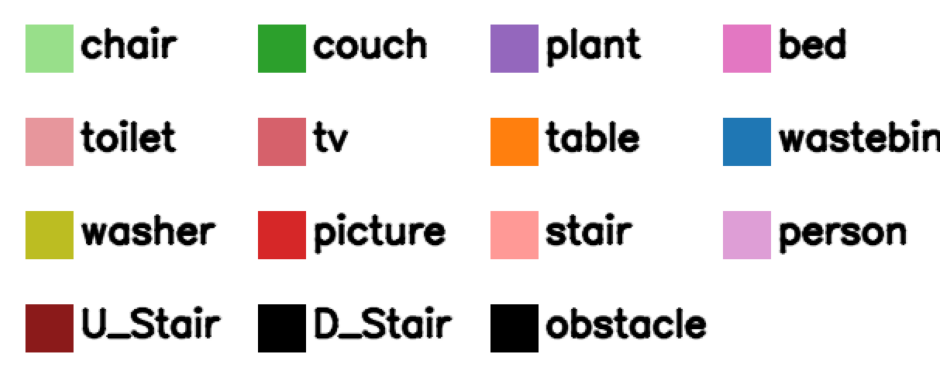

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 现有的类别数据，调整了 up_stair 和 down_stair 的缩写
reference_object_ids = {
    "chair": 3,
    "couch": 10,
    "plant": 13,
    "bed": 11,
    "toilet": 18,
    "tv": 22,
    "table": 5,
    "wastebin": 7,
    "washer": 8,
    "picture": 6,
    "stair": 9,
    "person": 12,
    # 新加入的类别（已修改名称）
    "U_Stair": 42,
    "D_Stair": 43,
    "obstacle": 44
}

# 现有的颜色数据（增加几个新的颜色）
MPCAT40_RGB_COLORS = [
    (17, 17, 17),  # 0
    (255, 255, 255),  # 1
    (174, 199, 232),  # 2
    (112, 128, 144),  # 3
    (152, 223, 138),  # 4
    (197, 176, 213),  # 5
    (255, 127, 14),  # 6
    (214, 39, 40),  # 7
    (31, 119, 180),  # 8
    (188, 189, 34),  # 9
    (255, 153, 150),  # 10
    (44, 160, 44),  # 11
    (227, 119, 194),  # 12
    (222, 158, 214),  # 13
    (148, 103, 189),  # 14
    (140, 162, 82),  # 15
    (132, 60, 57),  # 16
    (158, 218, 229),  # 17
    (158, 158, 222),  # 18
    (231, 150, 156),  # 19
    (99, 121, 57),  # 20
    (140, 86, 75),  # 21
    (219, 219, 141),  # 22
    (214, 97, 107),  # 23
    (206, 219, 156),  # 24
    (231, 186, 82),  # 25
    (57, 59, 121),  # 26
    (165, 81, 148),  # 27
    (173, 73, 74),  # 28
    (181, 207, 107),  # 29
    (82, 84, 163),  # 30
    (189, 157, 57),  # 31
    (196, 156, 148),  # 32
    (247, 182, 210),  # 33
    (107, 118, 207),  # 34
    (255, 187, 120),  # 35
    (199, 199, 199),  # 36
    (140, 109, 49),  # 37
    (231, 203, 148),  # 38
    (206, 109, 189),  # 39
    (23, 190, 207),  # 40
    (127, 127, 127),  # 41
    # 新增的颜色
    (128, 0, 128),  # 42 (UpStair)
    (139, 26, 26),  # 43 (DownStair)
    (0, 0, 0) ,      # 44 (obstacle)
    (0, 0, 0)       # 45 (obstacle)
]

def generate_legend_image():
    """Generates a 4x4 horizontal legend image for object categories and their corresponding colors."""
    legend_height = 40
    legend_margin = 10
    # 设置每行4个类别，最多展示4行
    num_cols = 4
    num_rows = (len(reference_object_ids) + num_cols - 1) // num_cols  # 计算行数
    legend_img_width = num_cols * 150  # 每个类别占 150 像素的宽度
    legend_img_height = num_rows * (legend_height + 20)  # 每行类别占 40 像素 + 间隔

    # 创建图像并填充白色
    legend_img = np.ones((legend_img_height, legend_img_width, 3), dtype=np.uint8) * 255

    x_offset = legend_margin  # 初始化 x 偏移
    y_offset = legend_margin  # 初始化 y 偏移

    for i, (class_name, class_id) in enumerate(reference_object_ids.items()):
        color_rgb = MPCAT40_RGB_COLORS[class_id+1]
        color_bgr = (color_rgb[2], color_rgb[1], color_rgb[0])  # 转为 BGR 格式

        # 在图例图像上绘制颜色矩形框
        cv2.rectangle(legend_img, (x_offset, y_offset), (x_offset + 30, y_offset + legend_height - 10), color_bgr, -1)

        # 绘制类别名称
        cv2.putText(legend_img, class_name, (x_offset + 35, y_offset + legend_height // 2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

        # 更新 x 偏移，准备绘制下一个类别
        x_offset += 150

        # 每行绘制完4个类别后，换行
        if (i + 1) % num_cols == 0:
            x_offset = legend_margin
            y_offset += legend_height + 20  # 换行时垂直间距

    return legend_img

# 生成图例图像
legend_img = generate_legend_image()

# 使用 OpenCV 将图例保存为文件（可选）
cv2.imwrite("legend_image_4x4_updated.png", legend_img)

# 在 Jupyter Notebook 中显示图例图像
plt.figure(figsize=(12, 9))
plt.imshow(cv2.cvtColor(legend_img, cv2.COLOR_BGR2RGB))  # 转换为 RGB 格式来显示
plt.axis('off')  # 不显示坐标轴
plt.show()


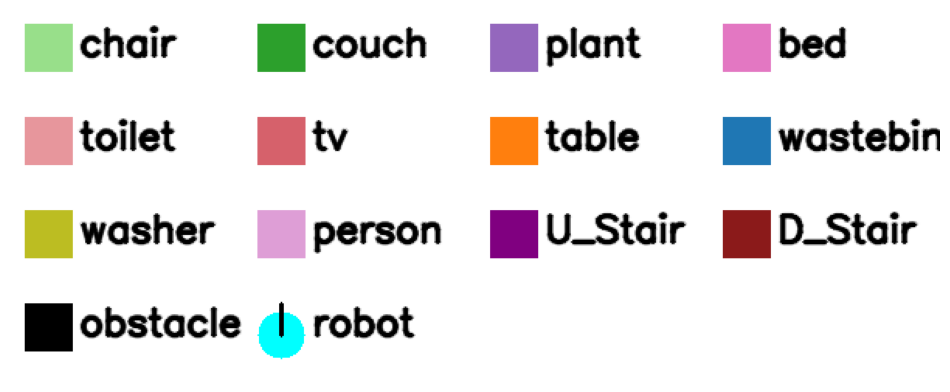

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 现有的类别数据，调整了 up_stair 和 down_stair 的缩写
reference_object_ids = {
    "chair": 3,
    "couch": 10,
    "plant": 13,
    "bed": 11,
    "toilet": 18,
    "tv": 22,
    "table": 5,
    "wastebin": 7,
    "washer": 8,
    # "picture": 6,
    # "stair": 9,
    "person": 12,
    "U_Stair": 41, # 42 - 1
    "D_Stair": 42,
    "obstacle": 43,
    "robot": 44,
}

# 现有的颜色数据（增加几个新的颜色）
MPCAT40_RGB_COLORS = [
    (17, 17, 17),  # 0
    (255, 255, 255),  # 1
    (174, 199, 232),  # 2
    (112, 128, 144),  # 3
    (152, 223, 138),  # 4
    (197, 176, 213),  # 5
    (255, 127, 14),  # 6
    (214, 39, 40),  # 7
    (31, 119, 180),  # 8
    (188, 189, 34),  # 9
    (255, 153, 150),  # 10
    (44, 160, 44),  # 11
    (227, 119, 194),  # 12
    (222, 158, 214),  # 13
    (148, 103, 189),  # 14
    (140, 162, 82),  # 15
    (132, 60, 57),  # 16
    (158, 218, 229),  # 17
    (158, 158, 222),  # 18
    (231, 150, 156),  # 19
    (99, 121, 57),  # 20
    (140, 86, 75),  # 21
    (219, 219, 141),  # 22
    (214, 97, 107),  # 23
    (206, 219, 156),  # 24
    (231, 186, 82),  # 25
    (57, 59, 121),  # 26
    (165, 81, 148),  # 27
    (173, 73, 74),  # 28
    (181, 207, 107),  # 29
    (82, 84, 163),  # 30
    (189, 157, 57),  # 31
    (196, 156, 148),  # 32
    (247, 182, 210),  # 33
    (107, 118, 207),  # 34
    (255, 187, 120),  # 35
    (199, 199, 199),  # 36
    (140, 109, 49),  # 37
    (231, 203, 148),  # 38
    (206, 109, 189),  # 39
    (23, 190, 207),  # 40
    (127, 127, 127),  # 41
    (128, 0, 128),  # 42 (UpStair)
    (139, 26, 26),  # 43 (DownStair)
    (0, 0, 0),      # 44 (obstacle)
    (0, 255, 255),   # 45 (robot)
    
]

def generate_legend_image():
    """Generates a 4x4 horizontal legend image for object categories and their corresponding colors."""
    legend_height = 40
    legend_margin = 10
    # 设置每行4个类别，最多展示4行
    num_cols = 4
    num_rows = (len(reference_object_ids) + num_cols - 1) // num_cols  # 计算行数
    legend_img_width = num_cols * 150  # 每个类别占 150 像素的宽度
    legend_img_height = num_rows * (legend_height + 20)  # 每行类别占 40 像素 + 间隔

    # 创建图像并填充白色
    legend_img = np.ones((legend_img_height, legend_img_width, 3), dtype=np.uint8) * 255

    x_offset = legend_margin  # 初始化 x 偏移
    y_offset = legend_margin  # 初始化 y 偏移

    for i, (class_name, class_id) in enumerate(reference_object_ids.items()):
        color_rgb = MPCAT40_RGB_COLORS[class_id + 1]
        color_bgr = (color_rgb[2], color_rgb[1], color_rgb[0])  # 转为 BGR 格式

        if class_name == "robot":
            # 画蓝色圆形
            cv2.circle(legend_img, (x_offset+ 15, y_offset + legend_height // 2), 15, color_bgr, -1)
            # 画黑色线段
            heading_end_pt = (int(x_offset + 15 - 20 * np.cos(np.pi / 2)), int(y_offset + legend_height // 2 - 20 * np.sin(np.pi / 2)))
            cv2.line(legend_img, (x_offset + 15, y_offset + legend_height // 2), heading_end_pt, (0, 0, 0), 2)
            # 绘制类别名称
            cv2.putText(legend_img, class_name, (x_offset + 35, y_offset + legend_height // 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
        else:
            # 在图例图像上绘制颜色矩形框
            cv2.rectangle(legend_img, (x_offset, y_offset), (x_offset + 30, y_offset + legend_height - 10), color_bgr, -1)
            # 绘制类别名称
            cv2.putText(legend_img, class_name, (x_offset + 35, y_offset + legend_height // 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

        # 更新 x 偏移，准备绘制下一个类别
        x_offset += 150

        # 每行绘制完4个类别后，换行
        if (i + 1) % num_cols == 0:
            x_offset = legend_margin
            y_offset += legend_height + 20  # 换行时垂直间距

    return legend_img

# 生成图例图像
legend_img = generate_legend_image()

# 将图例图像转换为 RGB 格式
legend_img_rgb = cv2.cvtColor(legend_img, cv2.COLOR_BGR2RGB)

# 创建画布
fig, ax = plt.subplots(figsize=(12, 9))

# 显示图例图像
ax.imshow(legend_img_rgb)

# 设置坐标轴范围
ax.set_xlim(0, legend_img_rgb.shape[1])
ax.set_ylim(legend_img_rgb.shape[0], 0)  # 翻转 y 轴方向

# 去掉坐标轴
ax.axis('off')

# 显示图形
plt.show()

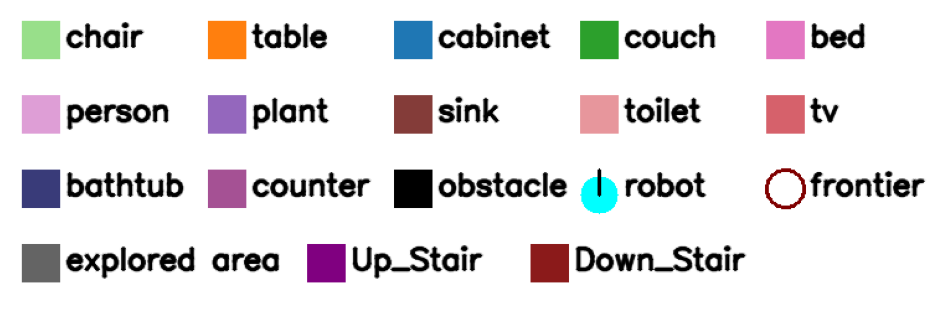

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 现有的类别数据，调整了 up_stair 和 down_stair 的缩写
reference_object_ids = {
    "chair": 3, # (112, 128, 144)
    # "door": 4,
    "table": 5, # (197, 176, 213)
    "cabinet": 7, # (214, 39, 40)
    "couch": 10,  #  (255, 153, 150)
    "bed": 11, # (44, 160, 44)
    "person": 12, # (227, 119, 194)
    "plant": 13, # (222, 158, 214)
    "sink": 15,
    "toilet": 18,
    
    # "stool": 19,
    "tv": 22,
    "bathtub": 25,
    "counter": 26,
    # "shelving": 31,
    "obstacle": 41,
    "robot": 42,
    "frontier": 43,  # 添加 frontier 类别
    "explored area": 44,
    "Up_Stair": 45, # 42 - 1
    "Down_Stair": 46,
}

reference_object_ids_rgb = {
    "chair": (112, 128, 144),
    "table": (197, 176, 213),
    "cabinet": (214, 39, 40),
    "couch": (255, 153, 150),
    "bed": (44, 160, 44),
    "person": (227, 119, 194),
    "plant": (222, 158, 214),
    "sink": (140, 162, 82),
    "toilet": (158, 158, 222),
    "tv": (219, 219, 141),
    "bathtub": (231, 186, 82),
    "counter": (57, 59, 121),
    "obstacle": (0, 0, 0),
    "explored area": (100, 100, 100),
    "Up_Stair": (128, 0, 128),
    "Down_Stair": (139, 26, 26),
}

# 现有的颜色数据（增加几个新的颜色）
MPCAT40_RGB_COLORS = [
    (17, 17, 17),  # 0
    (255, 255, 255),  # 1
    (174, 199, 232),  # 2
    (112, 128, 144),  # 3
    (152, 223, 138),  # 4
    (197, 176, 213),  # 5
    (255, 127, 14),  # 6
    (214, 39, 40),  # 7
    (31, 119, 180),  # 8
    (188, 189, 34),  # 9
    (255, 153, 150),  # 10
    (44, 160, 44),  # 11
    (227, 119, 194),  # 12
    (222, 158, 214),  # 13
    (148, 103, 189),  # 14
    (140, 162, 82),  # 15
    (132, 60, 57),  # 16
    (158, 218, 229),  # 17
    (158, 158, 222),  # 18
    (231, 150, 156),  # 19
    (99, 121, 57),  # 20
    (140, 86, 75),  # 21
    (219, 219, 141),  # 22
    (214, 97, 107),  # 23
    (206, 219, 156),  # 24
    (231, 186, 82),  # 25
    (57, 59, 121),  # 26
    (165, 81, 148),  # 27
    (173, 73, 74),  # 28
    (181, 207, 107),  # 29
    (82, 84, 163),  # 30
    (189, 157, 57),  # 31
    (196, 156, 148),  # 32
    (247, 182, 210),  # 33
    (107, 118, 207),  # 34
    (255, 187, 120),  # 35
    (199, 199, 199),  # 36
    (140, 109, 49),  # 37
    (231, 203, 148),  # 38
    (206, 109, 189),  # 39
    (23, 190, 207),  # 40
    (127, 127, 127),  # 41
    (0, 0, 0),      # 42 (obstacle)
    (0, 255, 255),   # 43 (robot)
    (128, 0, 0),     # 44 (frontier)
    (100, 100, 100),  # 45 (explored)
    (128, 0, 128),  # 46 (UpStair)
    (139, 26, 26),  # 47 (DownStair)
]

def generate_legend_image():
    """Generates a 4x4 horizontal legend image for object categories and their corresponding colors."""
    legend_height = 40
    legend_margin = 10
    # 设置每行4个类别，最多展示4行
    num_cols = 5
    num_rows = (len(reference_object_ids) + num_cols - 1) // num_cols  # 计算行数
    legend_img_width = num_cols * 150  # 每个类别占 150 像素的宽度
    legend_img_height = num_rows * (legend_height + 20)  # 每行类别占 40 像素 + 间隔

    # 创建图像并填充白色
    legend_img = np.ones((legend_img_height, legend_img_width, 3), dtype=np.uint8) * 255

    x_offset = legend_margin  # 初始化 x 偏移
    y_offset = legend_margin  # 初始化 y 偏移

    for i, (class_name, class_id) in enumerate(reference_object_ids.items()):
        color_rgb = MPCAT40_RGB_COLORS[class_id + 1]
        color_bgr = (color_rgb[2], color_rgb[1], color_rgb[0])  # 转为 BGR 格式

        if class_name == "robot":
            # 画蓝色圆形
            cv2.circle(legend_img, (x_offset+ 15, y_offset + legend_height // 2), 15, color_bgr, -1)
            # 画黑色线段
            heading_end_pt = (int(x_offset + 15 - 20 * np.cos(np.pi / 2)), int(y_offset + legend_height // 2 - 20 * np.sin(np.pi / 2)))
            cv2.line(legend_img, (x_offset + 15, y_offset + legend_height // 2), heading_end_pt, (0, 0, 0), 2)
            # 绘制类别名称
            cv2.putText(legend_img, class_name, (x_offset + 35, y_offset + legend_height // 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
        elif class_name == "frontier":
            # 画 frontier 圆形
            cv2.circle(legend_img, (x_offset + 15, y_offset + legend_height // 2 - 5), 15, color_bgr, 2)
            # 绘制类别名称
            cv2.putText(legend_img, class_name, (x_offset + 35, y_offset + legend_height // 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
        elif class_name == "Up_Stair":
            # 在图例图像上绘制颜色矩形框
            cv2.rectangle(legend_img, (x_offset + 80, y_offset), (x_offset + 110, y_offset + legend_height - 10), color_bgr, -1)
            # 绘制类别名称
            cv2.putText(legend_img, class_name, (x_offset + 115, y_offset + legend_height // 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
        elif class_name == "Down_Stair":
            # 在图例图像上绘制颜色矩形框
            cv2.rectangle(legend_img, (x_offset + 110, y_offset), (x_offset + 140, y_offset + legend_height - 10), color_bgr, -1)
            # 绘制类别名称
            cv2.putText(legend_img, class_name, (x_offset + 145, y_offset + legend_height // 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
        else:
            # 在图例图像上绘制颜色矩形框
            cv2.rectangle(legend_img, (x_offset, y_offset), (x_offset + 30, y_offset + legend_height - 10), color_bgr, -1)
            # 绘制类别名称
            cv2.putText(legend_img, class_name, (x_offset + 35, y_offset + legend_height // 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

        # 更新 x 偏移，准备绘制下一个类别
        x_offset += 150

        # 每行绘制完4个类别后，换行
        if (i + 1) % num_cols == 0:
            x_offset = legend_margin
            y_offset += legend_height + 20  # 换行时垂直间距

    return legend_img

# 生成图例图像
legend_img = generate_legend_image()

# 将图例图像转换为 RGB 格式
legend_img_rgb = cv2.cvtColor(legend_img, cv2.COLOR_BGR2RGB)

# 创建画布
fig, ax = plt.subplots(figsize=(12, 9))

# 显示图例图像
ax.imshow(legend_img_rgb)

# 设置坐标轴范围
ax.set_xlim(0, legend_img_rgb.shape[1])
ax.set_ylim(legend_img_rgb.shape[0], 0)  # 翻转 y 轴方向

# 去掉坐标轴
ax.axis('off')

# 显示图形
plt.show()

## 测试LLm语义相似度

In [3]:
import torch
from transformers import AutoModel, AutoTokenizer
import torch.nn.functional as F
import numpy as np

class INTERNVL2_5ITM:
    def __init__(self, model_name: str = "/home/zeyingg/github/habitat-lab-vlfm/InternVL/InternVL2_5-2B", device: str = None):
        if device is None:
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.device = device

        print(f"Loading model {model_name}...")
        self.model = AutoModel.from_pretrained(
            model_name,
            torch_dtype=torch.bfloat16,
            low_cpu_mem_usage=True,
            use_flash_attn=False,
            trust_remote_code=True,
        ).eval().to(self.device)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True, use_fast=False)
        print(f"Model max sequence length: {self.tokenizer.model_max_length}")
        print("Model and tokenizer loaded!")

    def encode_texts(self, texts: list[str]) -> torch.Tensor:
        """
        将文本列表编码为归一化的特征向量。
        
        :param texts: 输入的文本列表
        :return: 归一化的文本特征向量，形状为 [num_texts, hidden_size]
        """
        # 分词并移至设备
        inputs = self.tokenizer(
            texts,
            return_tensors='pt',
            padding=True,
            truncation=True,
            max_length=self.tokenizer.model_max_length
        ).to(self.device)
        
        # 提取文本特征
        with torch.no_grad():
            outputs = self.model.language_model(**inputs, output_hidden_states=True)  # 提取文本编码器的输出
            print(outputs)
            # 检查输出结构，确保正确提取最后一层的隐藏状态
            if hasattr(outputs, 'last_hidden_state'):
                last_hidden_state = outputs.last_hidden_state
            elif hasattr(outputs, 'hidden_states') and outputs.hidden_states is not None:
                last_hidden_state = outputs.hidden_states[-1]
            else:
                raise ValueError("Output structure does not contain 'last_hidden_state' or 'hidden_states'")
            
            cls_embeddings = last_hidden_state[:, 0, :]  # 提取 [CLS] token 的向量
        
        # L2 归一化
        return F.normalize(cls_embeddings, p=2, dim=-1)

    def calculate_similarity(self, scenes: list[str], objects: list[str]) -> np.ndarray:
        """
        计算场景与物体的语义相似度矩阵。
        
        :param scenes: 场景文本列表
        :param objects: 物体文本列表
        :return: 相似度矩阵，形状为 [num_scenes, num_objects]
        """
        # 编码场景和物体文本
        scene_embeds = self.encode_texts(scenes)  # [num_scenes, hidden_size]
        object_embeds = self.encode_texts(objects)  # [num_objects, hidden_state]
        
        # 计算余弦相似度矩阵
        similarity_matrix = torch.mm(scene_embeds, object_embeds.T)  # [num_scenes, num_objects]
        return similarity_matrix.to(torch.float32).cpu().numpy()  # 转换为 float32

# 实例化模型
model = INTERNVL2_5ITM(model_name="/home/zeyingg/github/habitat-lab-vlfm/InternVL/InternVL2_5-2B", device="cuda")

# 定义场景和物体类别
scenes = ["living room", "kitchen", "bedroom"]
objects = ["sofa", "refrigerator", "bed", "television"]

# 计算相似度矩阵
similarity = model.calculate_similarity(scenes, objects)

# 打印结果
print("相似度矩阵（场景 vs 物体）:")
print(similarity)

Loading model /home/zeyingg/github/habitat-lab-vlfm/InternVL/InternVL2_5-2B...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Model max sequence length: 8192
Model and tokenizer loaded!
CausalLMOutputWithPast(loss=None, logits=tensor([[[-6.3750e+00, -2.0781e+00, -8.3203e-01,  ..., -3.1094e+00,
          -4.3125e+00, -3.3906e+00],
         [-4.5312e+00, -3.2812e+00, -1.6016e+00,  ..., -9.2773e-02,
           2.4707e-01, -1.5234e-01],
         [-1.0000e+01, -7.2500e+00,  1.8047e+00,  ...,  3.6875e+00,
           4.9375e+00,  3.6562e+00],
         [-1.1938e+01, -6.6875e+00,  4.1562e+00,  ...,  6.1562e+00,
           6.5625e+00,  3.0625e+00]],

        [[-6.3750e+00, -2.0781e+00, -8.3203e-01,  ..., -3.1094e+00,
          -4.3125e+00, -3.3906e+00],
         [-7.2812e+00, -5.8438e+00, -4.7188e+00,  ..., -3.9844e-01,
           1.7090e-01, -4.2383e-01],
         [-7.4375e+00, -5.0938e+00,  2.7161e-03,  ...,  2.5156e+00,
           3.0625e+00,  1.3438e+00],
         [-1.0375e+01, -3.9219e+00, -5.6562e+00,  ..., -1.6172e+00,
           3.2812e-01, -1.9844e+00]],

        [[-6.3750e+00, -2.0781e+00, -8.3203e-01,  ..., 

In [4]:
import torch
from transformers import BertModel, BertTokenizer
import torch.nn.functional as F
import numpy as np

class BertTextEncoder:
    def __init__(self, model_name: str = "bert-base-uncased", device: str = None):
        if device is None:
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.device = device

        print(f"Loading model {model_name}...")
        self.model = BertModel.from_pretrained(model_name).eval().to(self.device)
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        print(f"Model max sequence length: {self.tokenizer.model_max_length}")
        print("Model and tokenizer loaded!")

    def encode_texts(self, texts: list[str]) -> torch.Tensor:
        """
        将文本列表编码为归一化的特征向量。
        
        :param texts: 输入的文本列表
        :return: 归一化的文本特征向量，形状为 [num_texts, hidden_size]
        """
        # 分词并移至设备
        inputs = self.tokenizer(
            texts,
            return_tensors='pt',
            padding=True,
            truncation=True,
            max_length=self.tokenizer.model_max_length
        ).to(self.device)
        
        # 提取文本特征
        with torch.no_grad():
            outputs = self.model(**inputs)  # 提取文本编码器的输出
            last_hidden_state = outputs.last_hidden_state  # 获取最后一层的隐藏状态
            cls_embeddings = last_hidden_state[:, 0, :]  # 提取 [CLS] token 的向量
        
        # L2 归一化
        return F.normalize(cls_embeddings, p=2, dim=-1)

    def calculate_similarity(self, scenes: list[str], objects: list[str]) -> np.ndarray:
        """
        计算场景与物体的语义相似度矩阵。
        
        :param scenes: 场景文本列表
        :param objects: 物体文本列表
        :return: 相似度矩阵，形状为 [num_scenes, num_objects]
        """
        # 编码场景和物体文本
        scene_embeds = self.encode_texts(scenes)  # [num_scenes, hidden_size]
        object_embeds = self.encode_texts(objects)  # [num_objects, hidden_state]
        
        # 计算余弦相似度矩阵
        similarity_matrix = torch.mm(scene_embeds, object_embeds.T)  # [num_scenes, num_objects]
        return similarity_matrix.to(torch.float32).cpu().numpy()  # 转换为 float32

# 实例化模型
model = BertTextEncoder(model_name="bert-base-uncased", device="cuda")

# 定义场景和物体类别
scenes = ["living room", "kitchen", "bedroom"]
objects = ["sofa", "refrigerator", "bed", "television"]

# 计算相似度矩阵
similarity = model.calculate_similarity(scenes, objects)

# 打印结果
print("相似度矩阵（场景 vs 物体）:")
print(similarity)

Loading model bert-base-uncased...


/home/zeyingg/anaconda3/envs/h3vlfm_world/lib/python3.9/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Model max sequence length: 512
Model and tokenizer loaded!
相似度矩阵（场景 vs 物体）:
[[0.8353048  0.8824961  0.8384708  0.82267463]
 [0.96780545 0.96596354 0.9627105  0.8953503 ]
 [0.9759042  0.95017606 0.9788424  0.87982786]]


In [2]:
from sentence_transformers import SentenceTransformer
import torch
import numpy as np

class SentenceTransformerEncoder:
    def __init__(self, model_name: str = "sentence-transformers/all-MiniLM-L6-v2", device: str = None):
        if device is None:
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.device = device

        print(f"Loading model {model_name}...")
        self.model = SentenceTransformer(model_name).to(self.device)
        print("Model loaded!")

    def encode_texts(self, texts: list[str]) -> torch.Tensor:
        """
        将文本列表编码为归一化的特征向量。
        
        :param texts: 输入的文本列表
        :return: 归一化的文本特征向量，形状为 [num_texts, hidden_size]
        """
        # 编码文本
        embeddings = self.model.encode(texts, convert_to_tensor=True, device=self.device)
        return embeddings

    def calculate_similarity(self, scenes: list[str], objects: list[str]) -> np.ndarray:
        """
        计算场景与物体的语义相似度矩阵。
        
        :param scenes: 场景文本列表
        :param objects: 物体文本列表
        :return: 相似度矩阵，形状为 [num_scenes, num_objects]
        """
        # 编码场景和物体文本
        scene_embeds = self.encode_texts(scenes)  # [num_scenes, hidden_size]
        object_embeds = self.encode_texts(objects)  # [num_objects, hidden_size]
        
        # 计算余弦相似度矩阵
        similarity_matrix = torch.nn.functional.cosine_similarity(
            scene_embeds.unsqueeze(1), object_embeds.unsqueeze(0), dim=2
        )  # [num_scenes, num_objects]
        return similarity_matrix.to(torch.float32).cpu().numpy()  # 转换为 float32

# 实例化模型
model = SentenceTransformerEncoder(model_name="sentence-transformers/all-MiniLM-L6-v2", device="cuda")

# 定义场景和物体类别
scenes = ["living room", "kitchen", "bedroom"]
objects = ["sofa", "refrigerator", "bed", "television"]

# 计算相似度矩阵
similarity = model.calculate_similarity(scenes, objects)

# 打印结果
print("相似度矩阵（场景 vs 物体）:")
print(similarity)

Loading model sentence-transformers/all-MiniLM-L6-v2...
Model loaded!
相似度矩阵（场景 vs 物体）:
[[0.4433449  0.4293459  0.48002014 0.41306543]
 [0.34775734 0.5013957  0.4254458  0.4067352 ]
 [0.45827404 0.38675183 0.6985434  0.35508457]]


In [4]:
import nltk
from nltk.corpus import wordnet as wn

# 确保已下载 WordNet 数据
nltk.download('wordnet')

# 示例 Places365 类别
places365_categories = [
    "living_room", "kitchen", "bedroom", "bathroom", "dining_room",
    "classroom", "office", "library", "gym", "park", "beach", "mountain"
]

# 检查每个类别在 WordNet 中的存在性
for category in places365_categories:
    synsets = wn.synsets(category)
    if synsets:
        print(f"{category}: 存在，找到 {len(synsets)} 个同义词集")
    else:
        print(f"{category}: 未找到对应的同义词集")

[nltk_data] Downloading package wordnet to /home/zeyingg/nltk_data...


living_room: 存在，找到 1 个同义词集
kitchen: 存在，找到 1 个同义词集
bedroom: 存在，找到 1 个同义词集
bathroom: 存在，找到 2 个同义词集
dining_room: 存在，找到 1 个同义词集
classroom: 存在，找到 1 个同义词集
office: 存在，找到 7 个同义词集
library: 存在，找到 5 个同义词集
gym: 存在，找到 1 个同义词集
park: 存在，找到 8 个同义词集
beach: 存在，找到 2 个同义词集
mountain: 存在，找到 2 个同义词集


### 场景常识知识图谱 -- 房间 - 物体

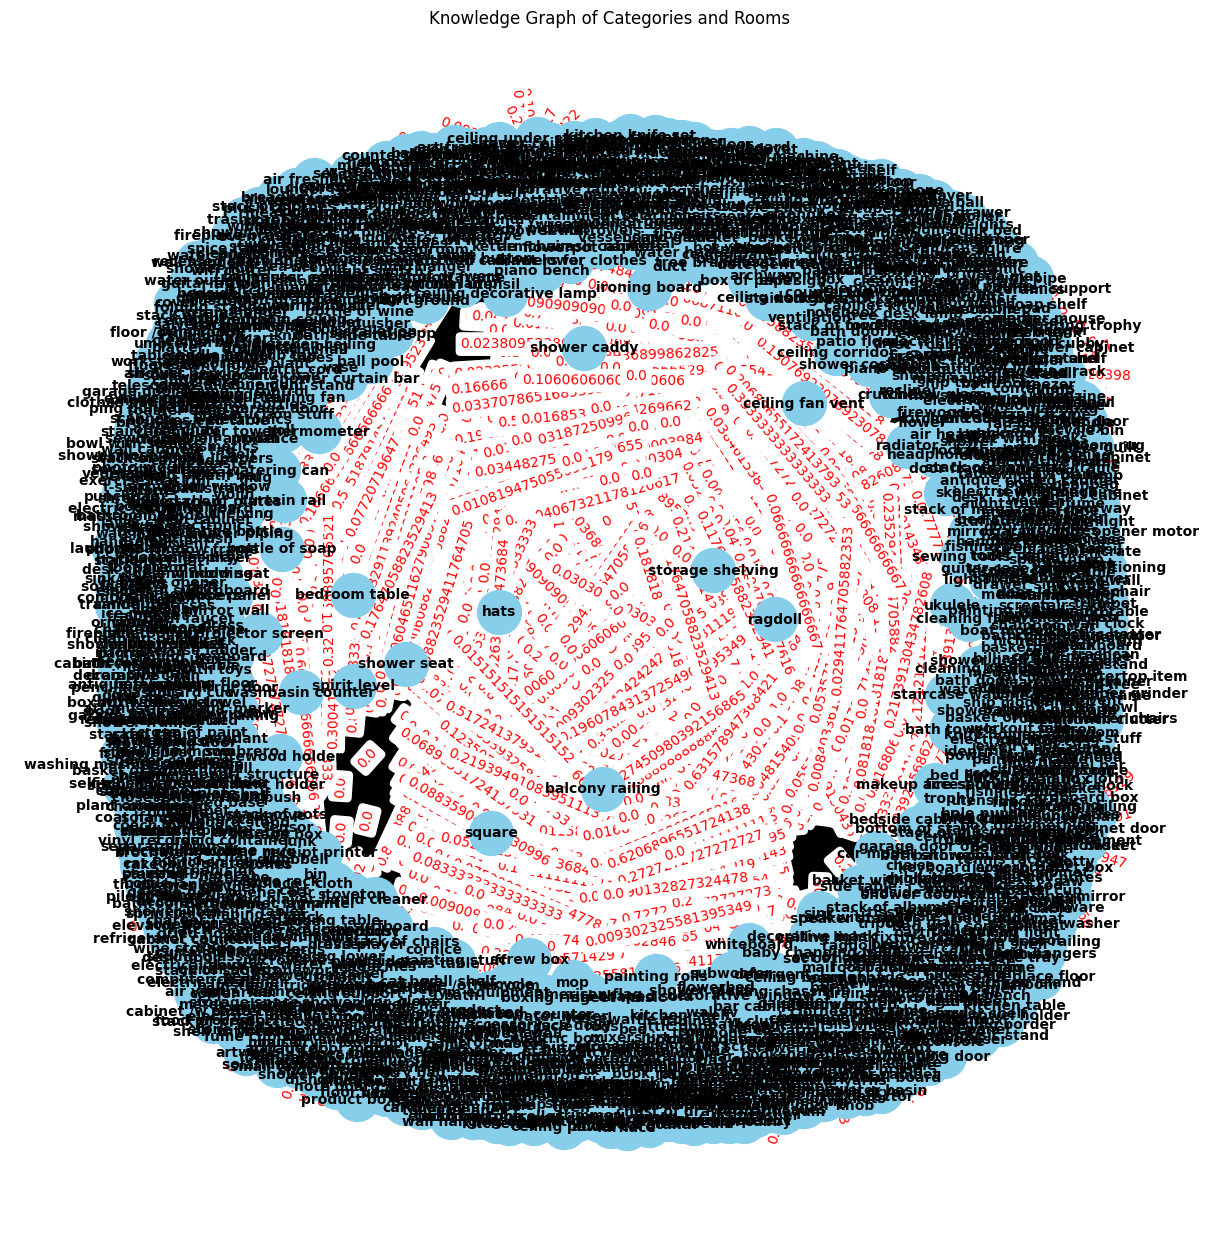

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json

# 1. 读取CSV文件
csv_file = 'Per_Category_Region_Per_Cat_Votes.csv'
df = pd.read_csv(csv_file)

# 2. 定义房间类型名称映射（HM3D -> Places365）
room_name_mapping = {
    "Bathroom": "bathroom",
    "Bedroom": "bedroom",
    "Dining room": "dining_room",
    "Garage": "garage",
    "Hall/stairwell": "hall",
    "Kitchen": "kitchen",
    "Laundry room": "laundry_room",
    "Living room": "living_room",
    "Office": "office",
    "Rec room": "rec_room"
}

# 3. 提取房间类型列（HM3D 命名）
room_columns = [
    "Bathroom", "Bedroom", "Dining room", "Garage", "Hall/stairwell", 
    "Kitchen", "Laundry room", "Living room", "Office", "Rec room"
]

# 4. 计算每个物体类别在各个房间类型的概率
knowledge_graph = nx.DiGraph()

for index, row in df.iterrows():
    category = row['Category Tag']
    total_instances = row["Bathroom"] + row["Bedroom"] + row["Dining room"] + row["Garage"] + \
          row["Hall/stairwell"] + row["Kitchen"] + row["Laundry room"] + row["Living room"] + row["Office"] + row["Rec room"]
    
    for room in room_columns:
        instances_in_room = row[room]
        if total_instances > 0:
            probability = instances_in_room / total_instances
        else:
            probability = 0
        
        # 将 HM3D 的房间类型名称映射到 Places365 的命名
        mapped_room = room_name_mapping[room]
        
        # 添加节点和边到知识图谱
        knowledge_graph.add_edge(category, mapped_room, weight=probability)

# 将知识图谱转换为字典格式
graph_data = nx.node_link_data(knowledge_graph)

# 保存为JSON文件
with open('knowledge_graph.json', 'w') as f:
    json.dump(graph_data, f, indent=4)

# 5. 可视化知识图谱（可选）
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(knowledge_graph, k=0.5, iterations=20)
nx.draw(knowledge_graph, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(knowledge_graph, 'weight')
nx.draw_networkx_edge_labels(knowledge_graph, pos, edge_labels=edge_labels, font_color='red')
plt.title('Knowledge Graph of Categories and Rooms')
plt.show()

### places365映射到目标类别

In [6]:
# 目标类别
target_categories = [
    "bathroom", "bedroom", "dining_room", "garage", "hall",
    "kitchen", "laundry_room", "living_room", "office", "rec_room"
]

# 直接映射表
direct_mapping = {
    # Bathroom 相关
    "bathroom": "bathroom",
    "shower": "bathroom",
    "jacuzzi/indoor": "bathroom",
    "sauna": "bathroom",

    # Bedroom 相关
    "bedroom": "bedroom",
    "bedchamber": "bedroom",
    "dorm_room": "bedroom",
    "hotel_room": "bedroom",
    "childs_room": "bedroom",

    # Dining Room 相关
    "dining_room": "dining_room",
    "dining_hall": "dining_room",
    "banquet_hall": "dining_room",
    "restaurant": "dining_room",
    "cafeteria": "dining_room",

    # Garage 相关
    "garage/indoor": "garage",
    "garage/outdoor": "garage",
    "parking_garage/indoor": "garage",
    "parking_garage/outdoor": "garage",
    "car_interior": "garage",

    # Hall 相关
    "entrance_hall": "hall",
    "lobby": "hall",
    "corridor": "hall",
    "mezzanine": "hall",

    # Kitchen 相关
    "kitchen": "kitchen",
    "restaurant_kitchen": "kitchen",
    "home_office": "kitchen",
    "pantry": "kitchen",
    "food_court": "kitchen",

    # Laundry Room 相关
    "laundry_room": "laundry_room",
    "laundromat": "laundry_room",
    "utility_room": "laundry_room",
    "basement": "laundry_room",
    "storage_room": "laundry_room",

    # Living Room 相关
    "living_room": "living_room",
    "home_theater": "living_room",
    "television_room": "living_room",
    "playroom": "living_room",
    "recreation_room": "living_room",

    # Office 相关
    "office": "office",
    "office_cubicles": "office",
    "conference_room": "office",
    "home_office": "office",
    "computer_room": "office",

    # Rec Room 相关
    "recreation_room": "rec_room",
    "playroom": "rec_room",
    "amusement_arcade": "rec_room",
    "gymnasium/indoor": "rec_room",
    "arcade": "rec_room",
}

# 保存映射表到文件
with open("places365_to_target_mapping.txt", "w") as f:
    for label, mapped in direct_mapping.items():
        f.write(f"{label}: {mapped}\n")

print("映射表已生成并保存到 places365_to_target_mapping.txt")

映射表已生成并保存到 places365_to_target_mapping.txt


In [4]:
class SceneClassifier:
    def __init__(self, mapping_file="places365_to_target_mapping.txt"):
        """
        初始化场景分类器
        :param mapping_file: 预存映射表文件路径
        """
        # 加载预存映射表
        self.mapping = self._load_mapping_file(mapping_file)
        
        # 定义标准目标类别集合
        self.target_categories = {
            "bathroom", "bedroom", "dining_room", "garage", "hall",
            "kitchen", "laundry_room", "living_room", "office", "rec_room"
        }

    def _load_mapping_file(self, file_path):
        """加载预存映射表文件"""
        mapping = {}
        try:
            with open(file_path, "r") as f:
                for line in f:
                    # 解析每行格式：原始类别: 目标类别
                    if ":" in line:
                        src, dst = line.strip().split(":", 1)
                        mapping[src.strip()] = dst.strip()
        except FileNotFoundError:
            raise RuntimeError(f"映射表文件 {file_path} 未找到")
        except Exception as e:
            raise RuntimeError(f"加载映射表失败: {str(e)}")
        return mapping

    def _normalize_label(self, label):
        """统一输入标签格式：小写+替换斜杠"""
        return label.lower().replace("/", "_")

    def extract_room_categories(self, top_5_classes):
        """
        改进后的分类逻辑：
        1. 优先使用预存映射表
        2. 过滤非目标类别
        3. 保留原始预测作为后备
        """
        valid_matches = []
        
        for raw_label in top_5_classes:
            # 标准化输入标签格式
            normalized = self._normalize_label(raw_label)
            
            # 查找映射表
            mapped_category = self.mapping.get(normalized, None)
            
            # 验证映射结果是否在目标类别集合中
            if mapped_category and mapped_category in self.target_categories:
                if mapped_category not in valid_matches:
                    valid_matches.append(mapped_category)
            elif mapped_category == "unknown":  # 特殊处理未知类别
                continue
            
        # 如果未找到有效映射，返回原始top1的标准化形式
        if not valid_matches:
            original_top1 = self._normalize_label(top_5_classes[0])
            return [original_top1]
            
        return valid_matches

# 测试用例
if __name__ == "__main__":
    # 初始化分类器（假设映射文件在当前目录）
    classifier = SceneClassifier()
    
    # 测试用例 - 直接映射
    print(classifier.extract_room_categories(["bedroom", "unknown_place"]))  # ['bedroom']
    
    # 测试用例 - 多结果过滤
    print(classifier.extract_room_categories(["laundry", "garage", "office"]))  # ['laundry_room', 'garage', 'office']
    
    # 测试用例 - 未知类别处理
    print(classifier.extract_room_categories(["airport_terminal"]))  # ['airport_terminal']
    
    # 测试用例 - 混合场景
    print(classifier.extract_room_categories(["dining_room/outdoor", "corridor"]))  # ['dining_room', 'hall']

['bedroom']
['office']
['airport_terminal']
['hall']
